<a href="https://colab.research.google.com/github/Divyaraj1251yv/codsoft-/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [5]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].apply(lambda x: iris.target_names[x])

print(iris_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target target_names  


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 50

sepal_length_setosa = np.random.normal(loc=5.0, scale=0.5, size=n_samples)
sepal_length_versicolor = np.random.normal(loc=6.0, scale=0.5, size=n_samples)
sepal_length_virginica = np.random.normal(loc=6.5, scale=0.5, size=n_samples)

sepal_width_setosa = np.random.normal(loc=3.5, scale=0.3, size=n_samples)
sepal_width_versicolor = np.random.normal(loc=3.0, scale=0.3, size=n_samples)
sepal_width_virginica = np.random.normal(loc=3.0, scale=0.3, size=n_samples)

petal_length_setosa = np.random.normal(loc=1.5, scale=0.4, size=n_samples)
petal_length_versicolor = np.random.normal(loc=4.5, scale=0.4, size=n_samples)
petal_length_virginica = np.random.normal(loc=5.5, scale=0.4, size=n_samples)

petal_width_setosa = np.random.normal(loc=0.2, scale=0.2, size=n_samples)
petal_width_versicolor = np.random.normal(loc=1.5, scale=0.2, size=n_samples)
petal_width_virginica = np.random.normal(loc=2.0, scale=0.2, size=n_samples)

sepal_length = np.concatenate([sepal_length_setosa, sepal_length_versicolor, sepal_length_virginica])
sepal_width = np.concatenate([sepal_width_setosa, sepal_width_versicolor, sepal_width_virginica])
petal_length = np.concatenate([petal_length_setosa, petal_length_versicolor, petal_length_virginica])
petal_width = np.concatenate([petal_width_setosa, petal_width_versicolor, petal_width_virginica])

iris_df = pd.DataFrame({
    'sepal length (cm)': sepal_length,
    'sepal width (cm)': sepal_width,
    'petal length (cm)': petal_length,
    'petal width (cm)': petal_width,
    'target': np.repeat([0, 1, 2], n_samples)
})

target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['target_names'] = iris_df['target'].map(target_names)

print(iris_df)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           5.248357          3.575148           1.168402          0.187464   
1           4.930868          3.603934           1.275928          0.391028   
2           5.323844          3.295993           1.798917          0.002855   
3           5.761515          3.569676           1.744148          0.300809   
4           4.882923          3.587922           1.491639          0.093948   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


In [ ]:
print(iris_df.head(20))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [ ]:
print(iris_df.shape)

(150, 6)


In [ ]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


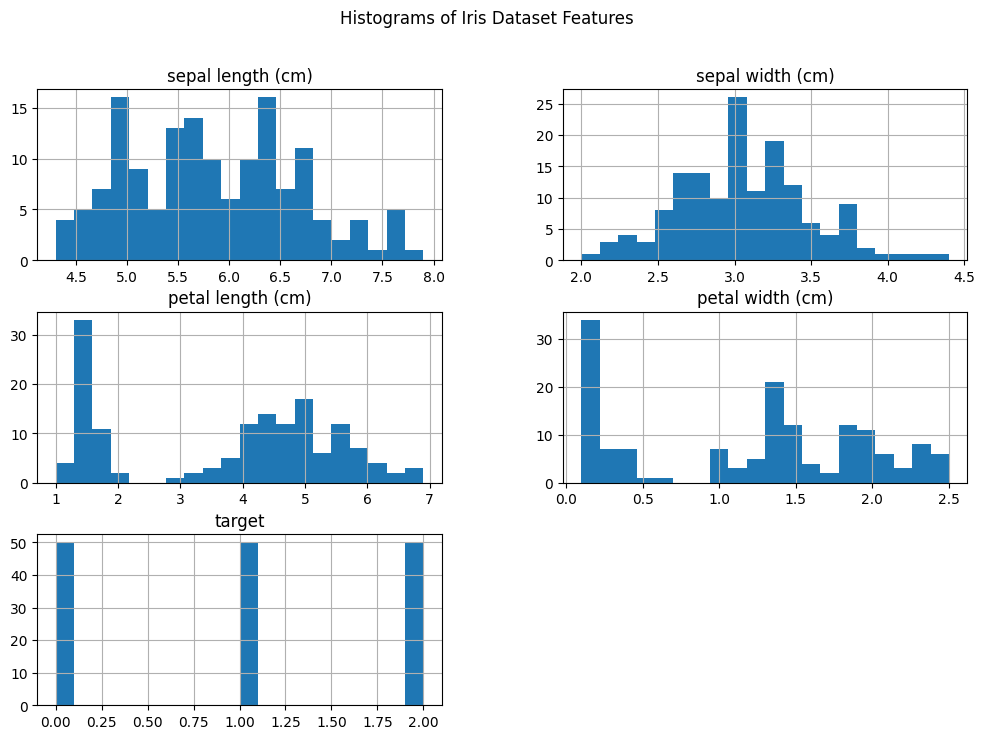

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].apply(lambda x: iris.target_names[x])

iris_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Iris Dataset Features')
plt.show()


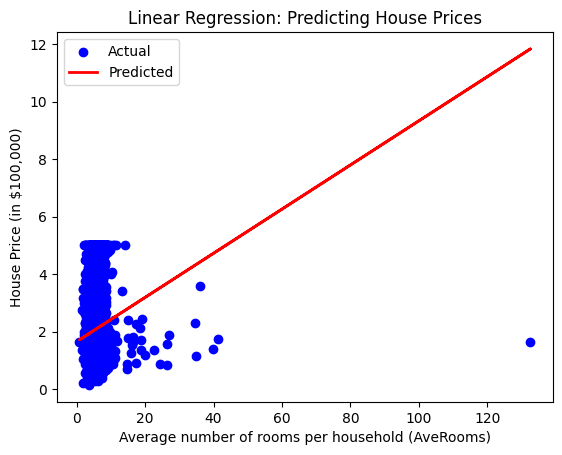

Mean Squared Error: 1.2923314440807299


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


california = fetch_california_housing()
X = california.data[:, np.newaxis, 2]
y = california.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average number of rooms per household (AveRooms)')
plt.ylabel('House Price (in $100,000)')
plt.title('Linear Regression: Predicting House Prices')
plt.legend()
plt.show()


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


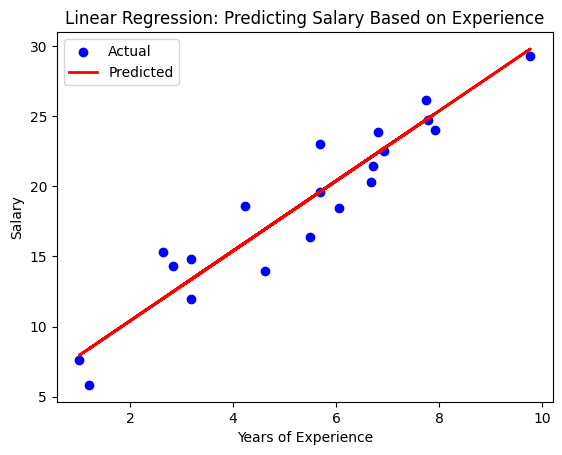

Mean Squared Error: 3.671012987885716


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2 + 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Predicting Salary Based on Experience')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


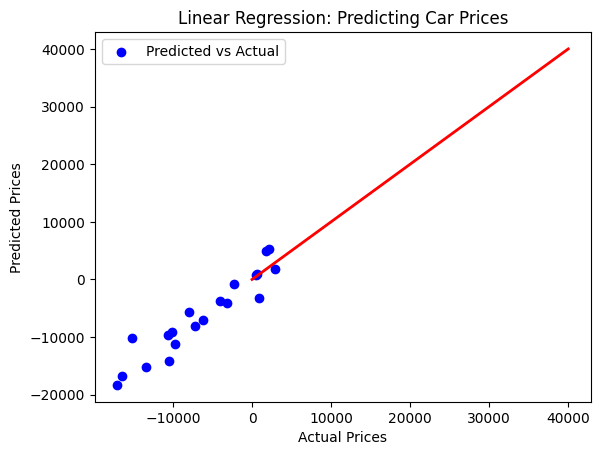

Mean Squared Error: 4684931.352100209


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(0)
num_samples = 100
engine_size = np.random.rand(num_samples, 1) * 3 + 1  # Engine size in liters
age = np.random.rand(num_samples, 1) * 10  # Age in years
mileage = np.random.rand(num_samples, 1) * 200000  # Mileage in km
price = 20000 - (5000 * engine_size) - (1500 * age) - (0.05 * mileage) + np.random.randn(num_samples, 1) * 2000

# Combine features into a single matrix
X = np.hstack([engine_size, age, mileage])
y = price

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results (for simplicity, we plot predicted vs actual prices)
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([0, 40000], [0, 40000], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicting Car Prices')
plt.legend()
plt.show()

# Print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Accuracy: 0.7932960893854749
Confusion Matrix:
[[90 15]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



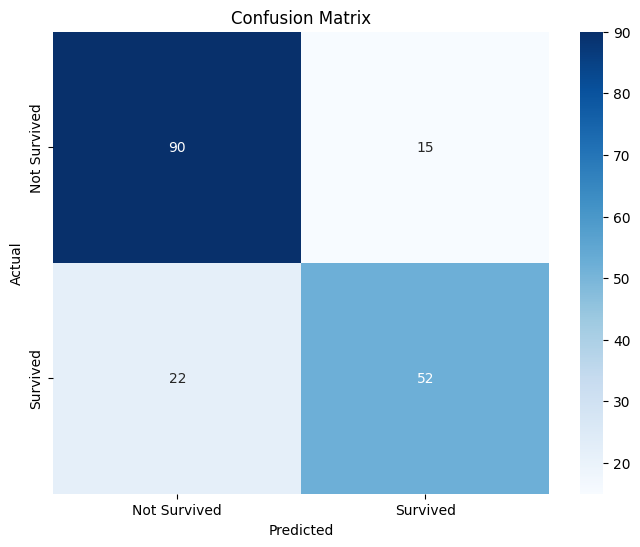

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

# Drop columns that won't be used for the prediction
titanic = titanic.drop(columns=['Name', 'Ticket', 'Cabin'])

# Fill missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Define features and target
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

# Preprocessing for numeric features
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


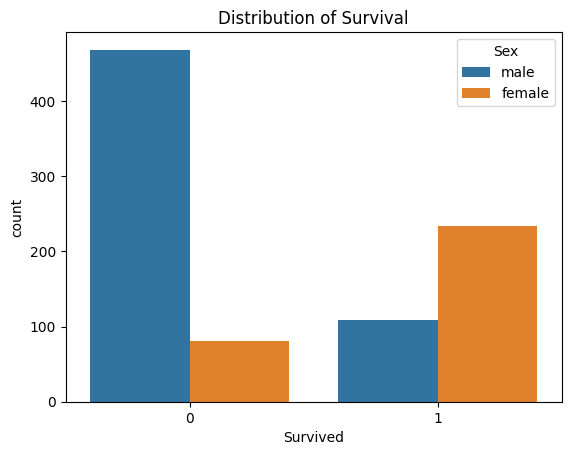

In [15]:
sns.countplot(x='Survived',hue="Sex", data=titanic)
plt.title('Distribution of Survival')
plt.show()

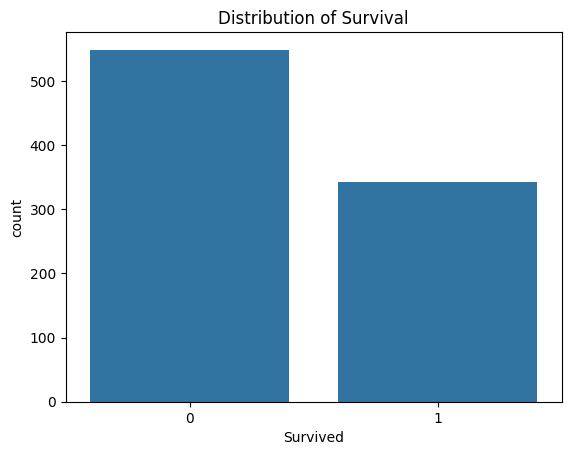

In [16]:
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

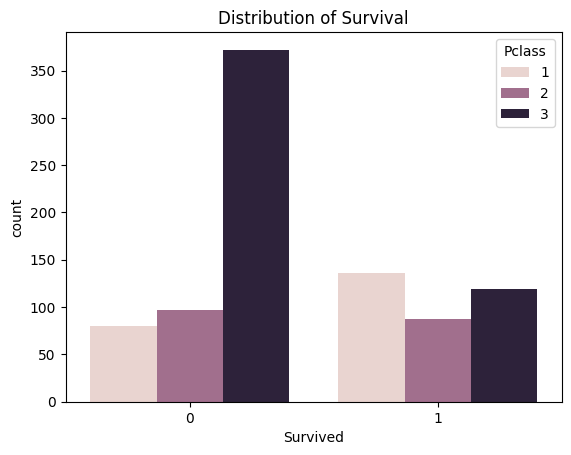

In [17]:

sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Distribution of Survival')
plt.show()

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


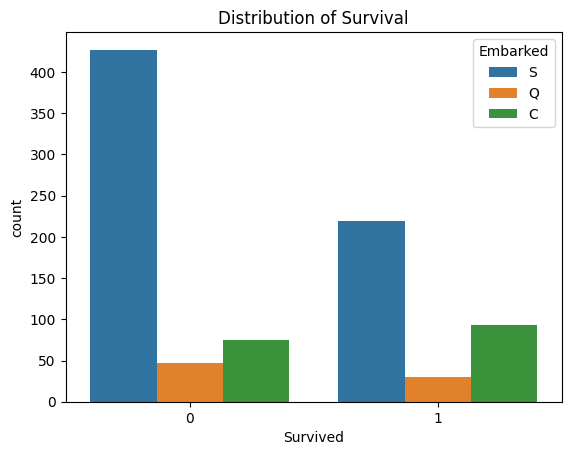

In [27]:
sns.countplot(x='Survived', hue='Embarked', data=titanic)
plt.title('Distribution of Survival')
plt.show()

In [28]:
titanic.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [29]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [30]:
titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: >

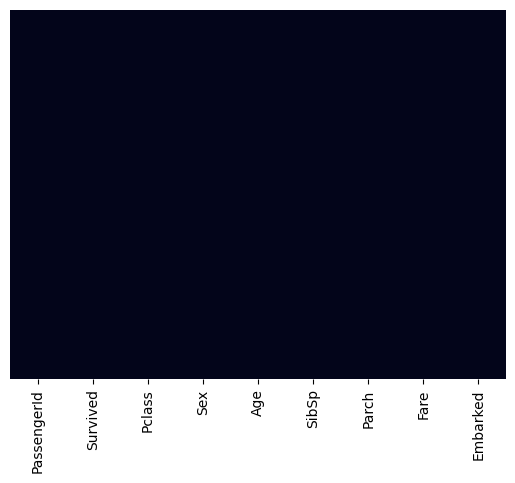

In [32]:
titanic.dropna(inplace= True)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Pclass', ylabel='Age'>

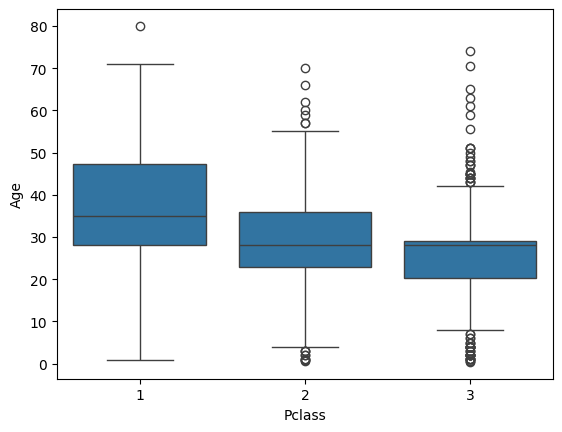

In [35]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7932960893854749